In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
#加载库
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [176]:
#加载数据集
df=pd.read_csv("/content/drive/MyDrive/机器学习/DecisionTree/隐形眼镜类型预测/lenses.txt",sep="\t",header=None,names=["age","prescript","astigmatic","tearRate","class"])
df

,age,prescript,astigmatic,tearRate,class
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses
5,young,hyper,no,normal,soft
6,young,hyper,yes,reduced,no lenses
7,young,hyper,yes,normal,hard
8,pre,myope,no,reduced,no lenses
9,pre,myope,no,normal,soft


In [177]:
#sklearn模型的fit()函数不能接收string类型的数据，在使用fit()函数之前，我们需要对数据集进行编码，LabelEncoder ：将字符串转换为增量值；OneHotEncoder：使用One-of-K算法将字符串转换为整数
#pandas可以使用get_dummies进行one-hot编码
#一般的，分类取值之间有大小意义时可以使用分类编码，将其编码为【0,1,2】；当分类变量的取值之间没有大小意义时，使用onehot编码。
#树模型由于分类数值只是类别符号，不具有偏序关系，因此可以不使用onehot编码，若树模型使用独热编码则一般起到增加树深度的作用。

#使用sklearn.preprocessing.OrdinalEncoder进行编码

In [178]:
df.shape

(24, 5)

In [179]:
#划分数据集和标签
#iloc按索引进行切片，loc按行列名称进行切片，注意需要同时定义行业列的拆分值
for i in range(df.shape[1]-1):
  print(i)
  df.iloc[:,i]=LabelEncoder().fit_transform(df.iloc[:,i]) #直接在df切片上修改
df

0
1
2
3


,age,prescript,astigmatic,tearRate,class
0,2,1,0,1,no lenses
1,2,1,0,0,soft
2,2,1,1,1,no lenses
3,2,1,1,0,hard
4,2,0,0,1,no lenses
5,2,0,0,0,soft
6,2,0,1,1,no lenses
7,2,0,1,0,hard
8,0,1,0,1,no lenses
9,0,1,0,0,soft


In [180]:
df_data=df.iloc[:,:-1]
df_label=df.iloc[:,-1:]
print(df_data.head(3))
print(df_label.head(3))

   age  prescript  astigmatic  tearRate
0    2          1           0         1
1    2          1           0         0
2    2          1           1         1
       class
0  no lenses
1       soft
2  no lenses


In [181]:
##模型拆分
train_data,test_data,train_label,test_label=train_test_split(df_data,df_label,test_size=0.2)

In [182]:
##模型训练
clf=DecisionTreeClassifier()
clf.fit(train_data,train_label)
clf.score(test_data,test_label)

0.8

In [183]:
#结果比较依赖数据集的拆分，不是很稳定，也有可能与样本量太少有关系

In [184]:
#决策树可视化
from sklearn import tree

[Text(209.25, 199.32, 'X[3] <= 0.5\ngini = 0.421\nsamples = 19\nvalue = [2, 14, 3]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.656\nsamples = 8\nvalue = [2, 3, 3]'),
 Text(83.7, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 90.6, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(83.7, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.4, 54.359999999999985, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(209.25, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 126.83999999999999, 'X[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0]'),
 Text(209.25, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(292.95, 90.6, 'gini = 0.0\nsamples = 2\n

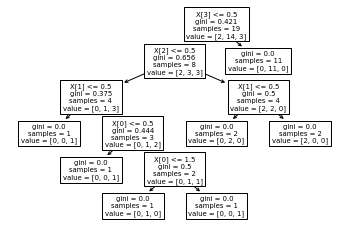

In [185]:
tree.plot_tree(clf) #太丑了，优化一下

Index(['age', 'prescript', 'astigmatic', 'tearRate'], dtype='object')
['no lenses' 'soft' 'hard']


[Text(251.875, 359.8833333333333, 'tearRate <= 0.5\ngini = 0.421\nsamples = 19\nvalue = [2, 14, 3]\nclass = soft'),
 Text(201.5, 294.45000000000005, 'astigmatic <= 0.5\ngini = 0.656\nsamples = 8\nvalue = [2, 3, 3]\nclass = soft'),
 Text(100.75, 229.01666666666668, 'prescript <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = hard'),
 Text(50.375, 163.58333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = hard'),
 Text(151.125, 163.58333333333334, 'age <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = hard'),
 Text(100.75, 98.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = hard'),
 Text(201.5, 98.14999999999998, 'age <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = soft'),
 Text(151.125, 32.7166666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = soft'),
 Text(251.875, 32.7166666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = hard'),
 Text(302.25, 229.01666666666668, 'prescript <= 0.5\ngini = 0.

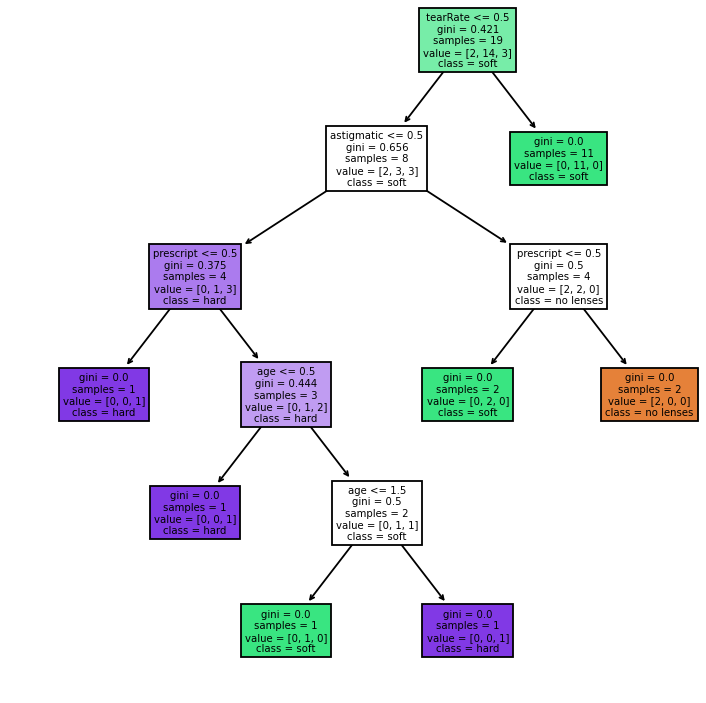

In [199]:
f_names=df_data.columns
c_names=df_label["class"].unique()   #class需要把分类名称给到
print(f_names)
print(c_names)
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=130)
tree.plot_tree(clf,feature_names=f_names,class_names=c_names,filled=True)

In [200]:
#特征重要性，分类器的.feature_importances_方法
clf.feature_importances_

array([0.16666667, 0.27083333, 0.21875   , 0.34375   ])